<a href="https://colab.research.google.com/github/RithvikYadav4/-Airline-Route-and-Price-Analysis-Using-SQL-and-Python/blob/main/Flight_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/airlines_flights_data.csv")
data.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## **Data Cleaning**

In [ ]:
data.drop( columns="index", inplace=True)
data

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [ ]:
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [ ]:
data.isnull().sum()

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


In [ ]:
data[data.duplicated]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price


EXPLORATION

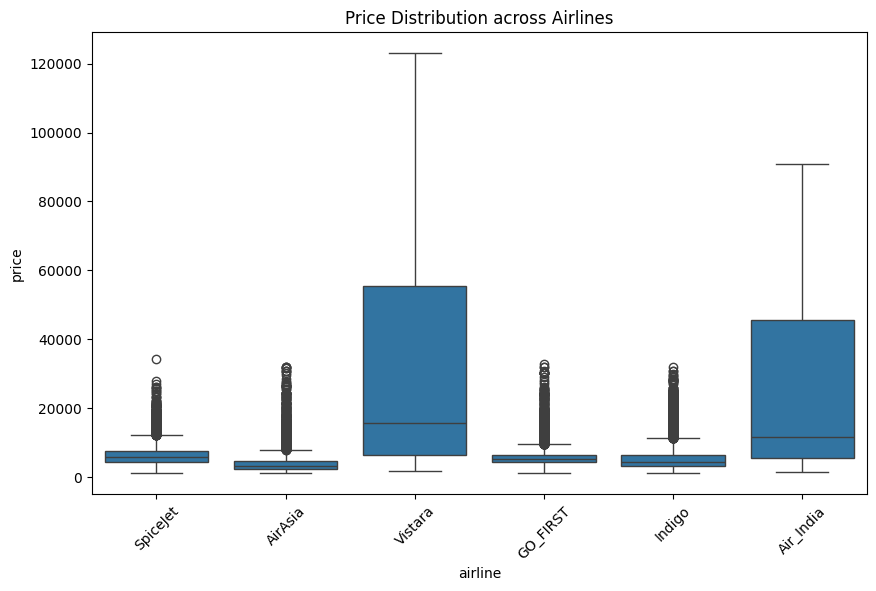

In [ ]:
# 1. Price Distribution across Airlines
plt.figure(figsize=(10,6))
sns.boxplot(x="airline", y="price", data=data)
plt.title("Price Distribution across Airlines")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-67868422.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="class", y="price", data=data, estimator=np.mean, palette="Set2")


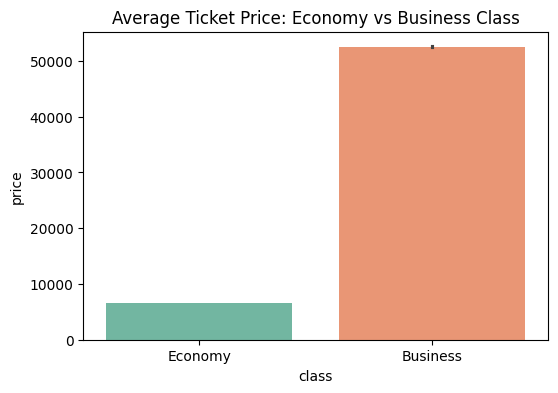

In [ ]:
#2. Average Price: Economy vs. Business Class
plt.figure(figsize=(6,4))
sns.barplot(x="class", y="price", data=data, estimator=np.mean, palette="Set2")
plt.title("Average Ticket Price: Economy vs Business Class")
plt.show()

/tmp/ipython-input-926532243.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sources.values, y=top_sources.index, ax=ax[0], palette="Blues_d")
/tmp/ipython-input-926532243.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_destinations.values, y=top_destinations.index, ax=ax[1], palette="Greens_d")


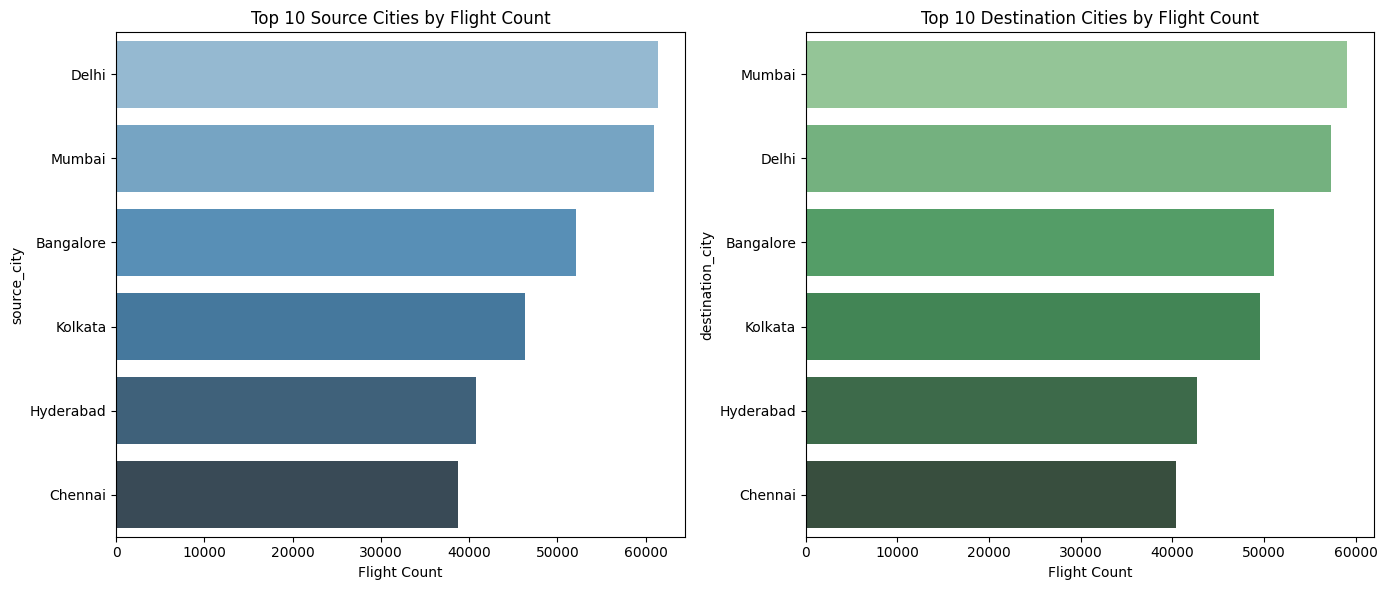

In [ ]:
# 3. Busiest Source & Destination Cities

fig, ax = plt.subplots(1,2, figsize=(14,6))

# Source
top_sources = data["source_city"].value_counts().head(10)
sns.barplot(x=top_sources.values, y=top_sources.index, ax=ax[0], palette="Blues_d")
ax[0].set_title("Top 10 Source Cities by Flight Count")
ax[0].set_xlabel("Flight Count")

# Destination
top_destinations = data["destination_city"].value_counts().head(10)
sns.barplot(x=top_destinations.values, y=top_destinations.index, ax=ax[1], palette="Greens_d")
ax[1].set_title("Top 10 Destination Cities by Flight Count")
ax[1].set_xlabel("Flight Count")

plt.tight_layout()
plt.show()

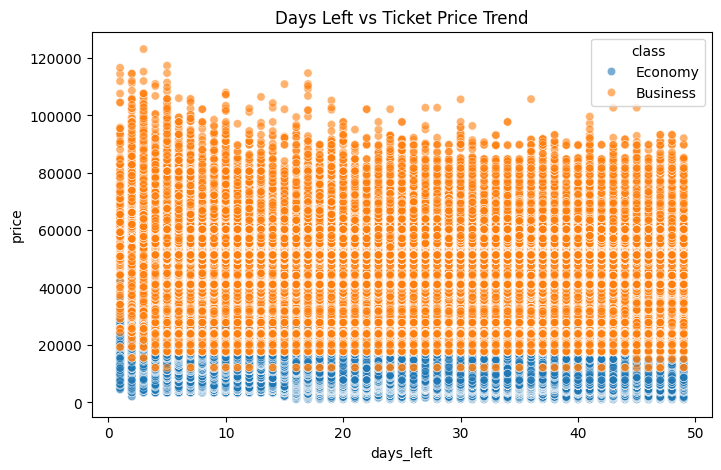

In [ ]:
# 4. Days Left vs. Ticket Price Trend
plt.figure(figsize=(8,5))
sns.scatterplot(x="days_left", y="price", hue="class", data=data, alpha=0.6)
plt.title("Days Left vs Ticket Price Trend")
plt.show()

/tmp/ipython-input-1494929248.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="stops", y="price", data=data, estimator=np.mean, palette="coolwarm")


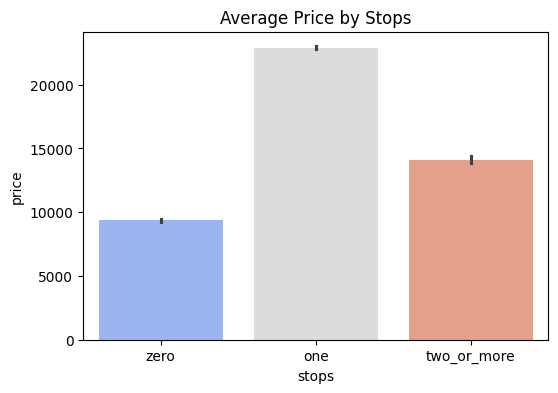

In [ ]:
# 5. Stops vs. Price Comparison
plt.figure(figsize=(6,4))
sns.barplot(x="stops", y="price", data=data, estimator=np.mean, palette="coolwarm")
plt.title("Average Price by Stops")
plt.show()

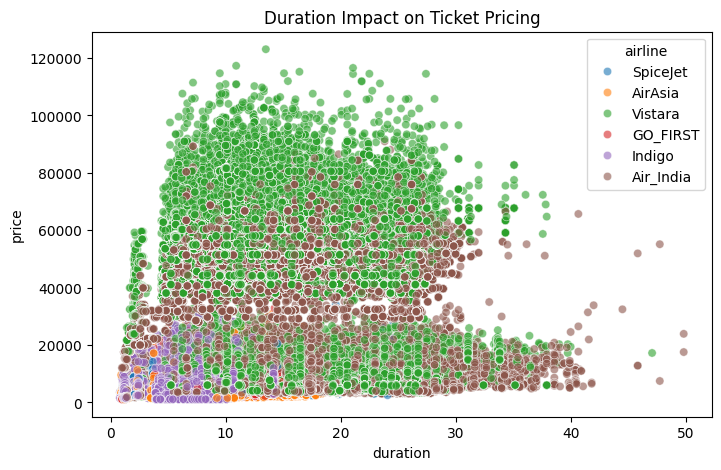

In [ ]:
# 6. Duration Impact on Ticket Pricing
plt.figure(figsize=(8,5))
sns.scatterplot(x="duration", y="price", hue="airline", data=data, alpha=0.6)
plt.title("Duration Impact on Ticket Pricing")
plt.show()

In [ ]:
!apt-get install sqlite3

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  sqlite3-doc
The following NEW packages will be installed:
  sqlite3
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 769 kB of archives.
After this operation, 1,874 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 sqlite3 amd64 3.37.2-2ubuntu0.5 [769 kB]
Fetched 769 kB in 1s (1,144 kB/s)
Selecting previously unselected package sqlite3.
(Reading database ... 126441 files and directories currently installed.)
Preparing to unpack .../sqlite3_3.37.2-2ubuntu0.5_amd64.deb ...
Unpacking sqlite3 (3.37.2-2ubuntu0.5) ...
Setting up sqlite3 (3.37.2-2ubuntu0.5) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
import sqlite3

In [ ]:
conn = sqlite3.connect("airlines.db")

In [ ]:
# Write dataframe to SQL table
data.to_sql("flights", conn, if_exists="replace", index=False)

300153

1. Find the average ticket price per airline

In [ ]:

query1 = """
SELECT airline, AVG(price) AS avg_price
FROM flights
GROUP BY airline
ORDER BY avg_price DESC;
"""
avg_price_per_airline = pd.read_sql(query1, conn)
print("Average Ticket Price per Airline:")
display(avg_price_per_airline)

Average Ticket Price per Airline:


,airline,avg_price
0,Vistara,30396.536302
1,Air_India,23507.019112
2,SpiceJet,6179.278881
3,GO_FIRST,5652.007595
4,Indigo,5324.216303
5,AirAsia,4091.072742


/tmp/ipython-input-1535441972.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='airline', y='avg_price', data=avg_price_per_airline, palette='viridis')


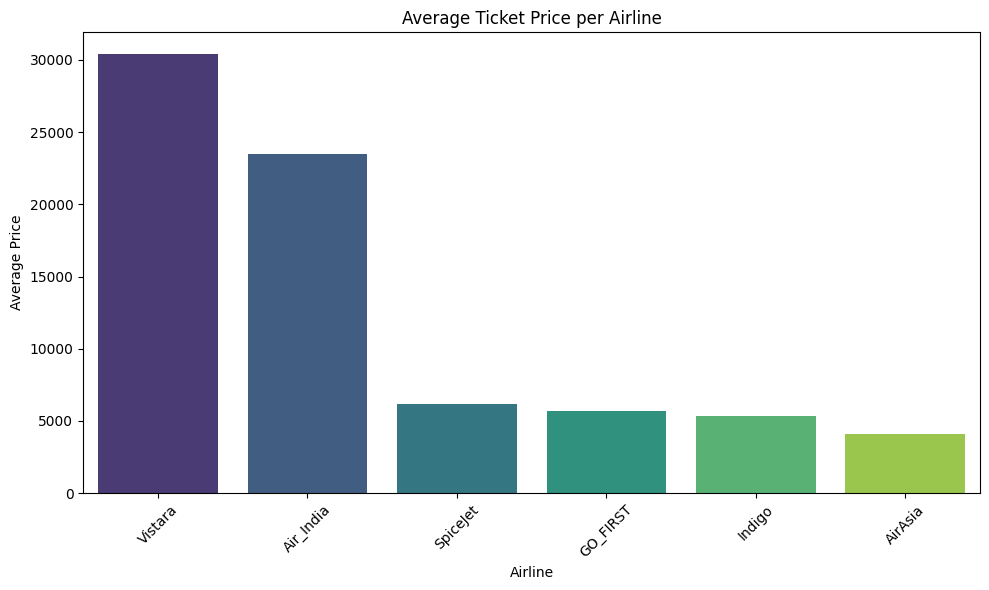

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='airline', y='avg_price', data=avg_price_per_airline, palette='viridis')
plt.title('Average Ticket Price per Airline')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2. List the top 5 most expensive routes (source to destination)

In [ ]:

query2 = """
SELECT source_city,destination_city AS route,
       AVG(price) AS avg_price
FROM flights
GROUP BY route
ORDER BY avg_price DESC
LIMIT 5;
"""
top_routes = pd.read_sql(query2, conn)
print("Top 5 Most Expensive Routes:")
display(top_routes)

Top 5 Most Expensive Routes:


,source_city,route,avg_price
0,Delhi,Kolkata,21959.557556
1,Delhi,Chennai,21953.323969
2,Delhi,Bangalore,21593.955784
3,Delhi,Mumbai,21372.529469
4,Delhi,Hyderabad,20427.661284


/tmp/ipython-input-267993756.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_price', y='route', data=top_routes, palette='viridis')


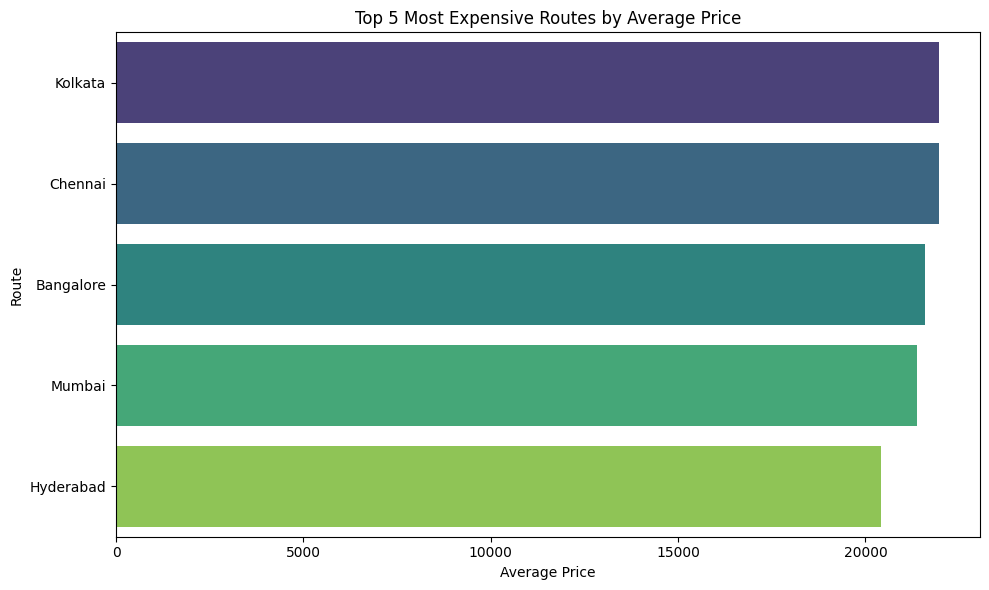

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='avg_price', y='route', data=top_routes, palette='viridis')
plt.title('Top 5 Most Expensive Routes by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Route')
plt.tight_layout()
plt.show()

3. Which airline offers the lowest average ticket price for Business class?

In [ ]:
query3="""
SELECT airline, ROUND(MIN(price),2) AS min_price
FROM flights
WHERE class= "Business"
GROUP BY airline
ORDER BY min_price
LIMIT 1;
"""
lowest=pd.read_sql(query3,conn)
display(lowest)

,airline,min_price
0,Air_India,12000.0


 4. Find routes with more than 50 flights and their average ticket prices.

In [ ]:
query4="""
SELECT source_city, destination_city, COUNT(*) AS total_flights, ROUND(AVG(price),2) AS
avg_price
FROM flights
GROUP BY source_city, destination_city
HAVING COUNT(*) > 50;
"""
routes=pd.read_sql(query4,conn)
display(routes)

,source_city,destination_city,total_flights,avg_price
0,Bangalore,Chennai,6410,23321.85
1,Bangalore,Delhi,13756,17723.31
2,Bangalore,Hyderabad,8928,21226.12
3,Bangalore,Kolkata,10028,23500.06
4,Bangalore,Mumbai,12939,23128.62
5,Chennai,Bangalore,6493,25081.85
6,Chennai,Delhi,9783,18981.86
7,Chennai,Hyderabad,6103,21591.35
8,Chennai,Kolkata,6983,22669.93
9,Chennai,Mumbai,9338,22765.85


Compare average price difference between Economy and Business class per airline.

In [ ]:
query5="""
SELECT airline,
    AVG(CASE WHEN class = "Economy" THEN price END) AS
avg_economy,
                AVG(CASE WHEN class = "Business" THEN price END) AS avg_busniess,
                (AVG(CASE WHEN class = "Economy" THEN price END) -
                AVG(CASE WHEN class = "Business" THEN price END))AS price_diff

 FROM flights
 GROUP BY airline;
"""
avgprice=pd.read_sql(query5,conn)
display(avgprice)

,airline,avg_economy,avg_busniess,price_diff
0,AirAsia,4091.072742,NaN,NaN
1,Air_India,7313.682169,47131.039212,-39817.357044
2,GO_FIRST,5652.007595,NaN,NaN
3,Indigo,5324.216303,NaN,NaN
4,SpiceJet,6179.278881,NaN,NaN
5,Vistara,7806.943645,55477.027777,-47670.084132


6.Which cities have the most incoming flights?  

In [ ]:
q6 = """
SELECT destination_city, COUNT(*) AS incoming_flights
FROM flights
GROUP BY destination_city
ORDER BY incoming_flights DESC;
"""
incoming = pd.read_sql(q6, conn)
print("Cities with Most Incoming Flights:")
display(incoming.head(10))

Cities with Most Incoming Flights:


,destination_city,incoming_flights
0,Mumbai,59097
1,Delhi,57360
2,Bangalore,51068
3,Kolkata,49534
4,Hyderabad,42726
5,Chennai,40368


 7. Which cities have the most outgoing flights?  

In [ ]:
q7 = """
SELECT source_city, COUNT(*) AS outgoing_flights
FROM flights
GROUP BY source_city
ORDER BY outgoing_flights DESC;
"""
outgoing = pd.read_sql(q7, conn)
print("Cities with Most Outgoing Flights:")
display(outgoing.head(10))

Cities with Most Outgoing Flights:


,source_city,outgoing_flights
0,Delhi,61343
1,Mumbai,60896
2,Bangalore,52061
3,Kolkata,46347
4,Hyderabad,40806
5,Chennai,38700


 8. Find the busiest route (most number of flights).

In [ ]:
q8 = """
SELECT source_city , destination_city AS route,
       COUNT(*) AS total_flights
FROM flights
GROUP BY route
ORDER BY total_flights DESC
LIMIT 1;
"""
busiest_route = pd.read_sql(q8, conn)
print("Busiest Route (Most Flights):")
display(busiest_route)

Busiest Route (Most Flights):


,source_city,route,total_flights
0,Delhi,Mumbai,59097


 9. List the top 3 airlines with cheapest average prices for each route.

In [ ]:
q9 = """
SELECT route, airline, avg_price
FROM (
    SELECT source_city,destination_city AS route,
           airline,
           AVG(price) AS avg_price,
           ROW_NUMBER() OVER (PARTITION BY source_city, destination_city ORDER BY AVG(price)) AS rn
    FROM flights
    GROUP BY source_city, destination_city, airline
)
WHERE rn <= 3;
"""
top3_cheapest = pd.read_sql(q9, conn)
print("Top 3 Cheapest Airlines per Route:")
display(top3_cheapest.head(20))

Top 3 Cheapest Airlines per Route:


,route,airline,avg_price
0,Chennai,AirAsia,2073.043478
1,Chennai,Indigo,2363.326241
2,Chennai,SpiceJet,2613.310345
3,Delhi,AirAsia,4807.092426
4,Delhi,GO_FIRST,5524.702628
5,Delhi,Indigo,6273.496685
6,Hyderabad,AirAsia,2931.494792
7,Hyderabad,Indigo,3220.662367
8,Hyderabad,SpiceJet,4338.000000
9,Kolkata,AirAsia,4443.468160


 10. Find flights with duration more than 5 hours but priced below average.

In [ ]:
q10 = """
SELECT *
FROM flights
WHERE duration > 5
  AND price < (SELECT AVG(price) FROM flights);
"""
long_cheaper = pd.read_sql(q10, conn)
print("Flights with Duration > 5 hrs but Below Avg Price:")
display(long_cheaper.head(10))

Flights with Duration > 5 hrs but Below Avg Price:


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,AirAsia,I5-747,Delhi,Evening,one,Early_Morning,Mumbai,Economy,12.25,1,5949
1,AirAsia,I5-747,Delhi,Evening,one,Morning,Mumbai,Economy,16.33,1,5949
2,GO_FIRST,G8-266,Delhi,Early_Morning,one,Evening,Mumbai,Economy,11.75,1,5954
3,GO_FIRST,G8-101,Delhi,Early_Morning,one,Night,Mumbai,Economy,14.50,1,5954
4,GO_FIRST,G8-103,Delhi,Evening,one,Morning,Mumbai,Economy,15.67,1,5954
5,AirAsia,I5-744,Delhi,Morning,one,Afternoon,Mumbai,Economy,5.83,1,8869
6,GO_FIRST,G8-165,Delhi,Early_Morning,one,Afternoon,Mumbai,Economy,8.00,1,10575
7,Indigo,6E-2373,Delhi,Afternoon,one,Evening,Mumbai,Economy,6.00,1,10838
8,Vistara,UK-813,Delhi,Evening,one,Morning,Mumbai,Economy,14.67,1,12150
9,Vistara,UK-817,Delhi,Evening,one,Morning,Mumbai,Economy,16.17,1,12150


 11. Which flight class shows the highest average price variation (std deviation)

In [ ]:
# Fetch class and price
q11 = "SELECT class, price FROM flights;"
df_class = pd.read_sql(q11, conn)

# Group by class and calculate mean + std deviation
class_var = df_class.groupby("class")["price"].agg(
    avg_price="mean",
    price_std="std"
).reset_index().sort_values(by="price_std", ascending=False)

print("Price Variation by Class (using Pandas):")
display(class_var)


Price Variation by Class (using Pandas):


,class,avg_price,price_std
0,Business,52540.081124,12969.314606
1,Economy,6572.342383,3743.519517


12. Find how ticket prices vary with number of days left before departure.  

In [ ]:
q12 = """
SELECT days_left, AVG(price) AS avg_price
FROM flights
GROUP BY days_left
ORDER BY days_left;
"""
days_price = pd.read_sql(q12, conn)
print("Ticket Prices vs Days Left:")
display(days_price.head(20))

Ticket Prices vs Days Left:


,days_left,avg_price
0,1,21591.867151
1,2,30211.299801
2,3,28976.083569
3,4,25730.905653
4,5,26679.773368
5,6,24856.493902
6,7,25588.367351
7,8,24895.883995
8,9,25726.246072
9,10,25572.819134


13. Which time of day (Morning, Evening, etc.) has the highest average ticket price?

In [ ]:
q13 = """
SELECT departure_time, AVG(price) AS avg_price
FROM flights
GROUP BY departure_time
ORDER BY avg_price DESC;
"""
time_price = pd.read_sql(q13, conn)
print("Average Ticket Price by Time of Day:")
display(time_price)

Average Ticket Price by Time of Day:


,departure_time,avg_price
0,Night,23062.146808
1,Morning,21630.760254
2,Evening,21232.361894
3,Early_Morning,20370.676718
4,Afternoon,18179.203331
5,Late_Night,9295.299387


/tmp/ipython-input-2328543875.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='departure_time', y='avg_price', data=time_price, palette='viridis')


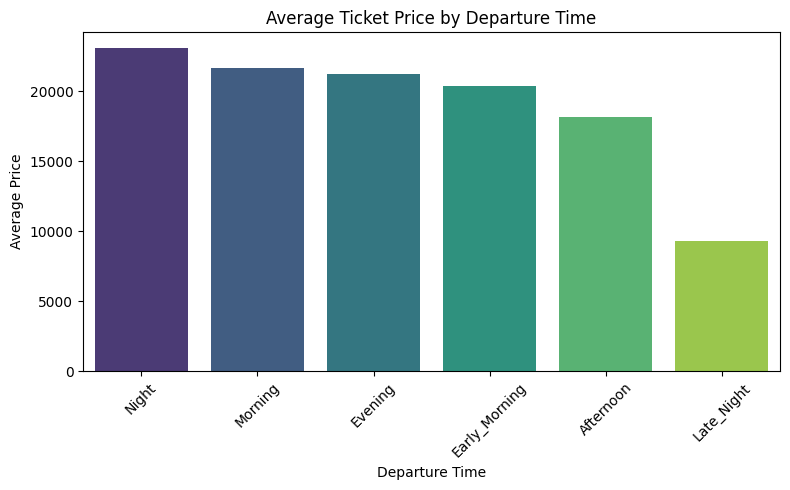

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='departure_time', y='avg_price', data=time_price, palette='viridis')
plt.title('Average Ticket Price by Departure Time')
plt.xlabel('Departure Time')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 14. Find Price trends by airline and travel class

In [ ]:
q14 = """
SELECT airline, class, AVG(price) AS avg_price
FROM flights
GROUP BY airline, class
ORDER BY airline, class;
"""
airline_class = pd.read_sql(q14, conn)
print("Price Trends by Airline & Class:")
display(airline_class)


Price Trends by Airline & Class:


,airline,class,avg_price
0,AirAsia,Economy,4091.072742
1,Air_India,Business,47131.039212
2,Air_India,Economy,7313.682169
3,GO_FIRST,Economy,5652.007595
4,Indigo,Economy,5324.216303
5,SpiceJet,Economy,6179.278881
6,Vistara,Business,55477.027777
7,Vistara,Economy,7806.943645


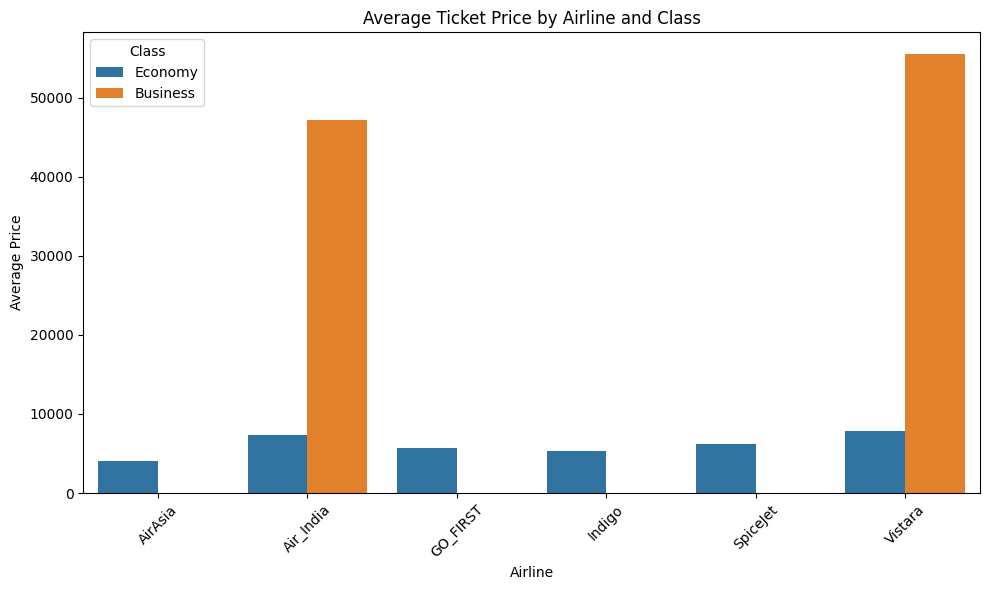

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='airline', y='avg_price', hue='class', data=airline_class)
plt.title('Average Ticket Price by Airline and Class')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(title='Class')
plt.tight_layout()
plt.show()

 15. Compare the airlines average prices for non-stop vs. 1-stop vs. 2 stops flights

In [ ]:
query15 = """
SELECT airline,
       CASE
           WHEN stops LIKE '%non%' THEN 'Non-stop'
           WHEN stops LIKE '1%' THEN '1 Stop'
           ELSE '2+ Stops'
       END AS stop_type,
       AVG(price) AS avg_price
FROM flights
GROUP BY airline, stop_type
ORDER BY airline, stop_type;
"""

stops_comparison = pd.read_sql(query15, conn)
print("Airlines Average Prices by Stop Type:")
display(stops_comparison)

Airlines Average Prices by Stop Type:


,airline,stop_type,avg_price
0,AirAsia,2+ Stops,4091.072742
1,Air_India,2+ Stops,23507.019112
2,GO_FIRST,2+ Stops,5652.007595
3,Indigo,2+ Stops,5324.216303
4,SpiceJet,2+ Stops,6179.278881
5,Vistara,2+ Stops,30396.536302


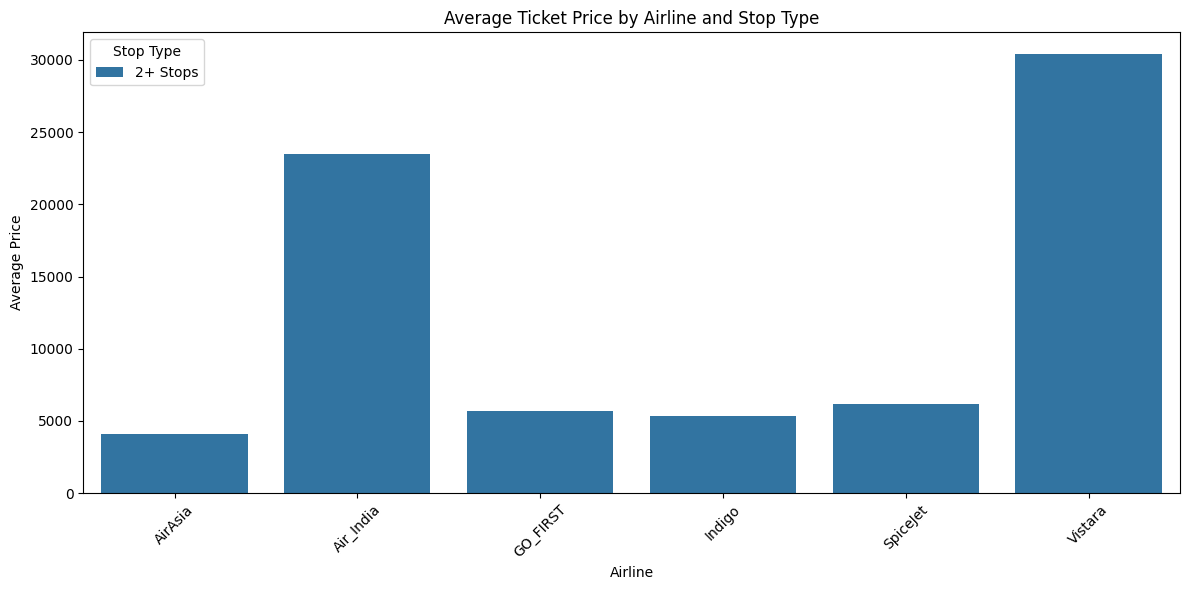

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='airline', y='avg_price', hue='stop_type', data=stops_comparison)
plt.title('Average Ticket Price by Airline and Stop Type')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(title='Stop Type')
plt.tight_layout()
plt.show()